In [1]:
import pandas as pd
import os.path as op
import seaborn as sns
import matplotlib.pyplot as plt
from mne.stats import permutation_cluster_1samp_test

In [2]:
masks = ['snc', 'vta', 'lc', 'meynert']
bids_folder = '/data/ds-risk'

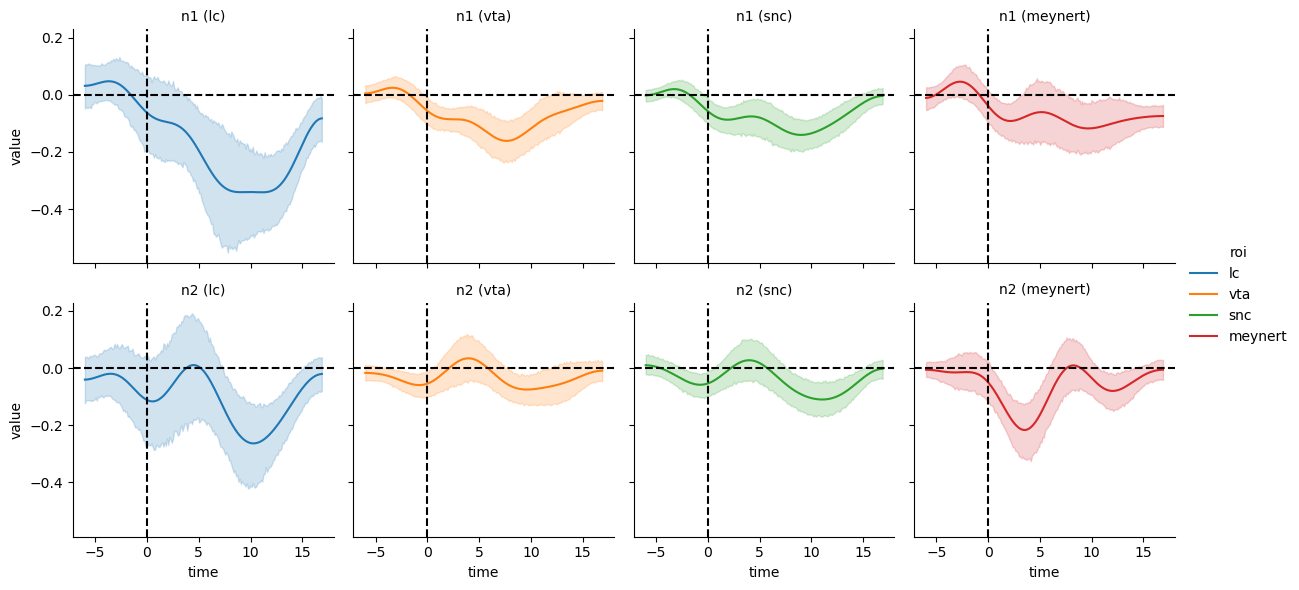

In [5]:
df = []

for mask in masks:
    fn = op.join(bids_folder, 'derivatives', 'roi_analysis', 'model-neural3', mask, 'timeseries.tsv')
    df.append(pd.read_csv(fn, sep='\t', index_col=[0,1,2, 3])[mask].to_frame('value'))

df = pd.concat(df, keys=masks, names=['roi'])

tmp = df.xs('intercept', 0, 'covariate').reset_index()

order = ['lc', 'vta', 'snc', 'meynert']

fac = sns.FacetGrid(tmp, row='event type', col='roi', hue='roi', col_order=order, hue_order=order)
fac.map(sns.lineplot, 'time', 'value', errorbar=('ci', 95))
fac.map(lambda *args, **kwargs: plt.axhline(0,0, c='k', ls='--'))
fac.map(lambda *args, **kwargs: plt.axvline(0,0, c='k', ls='--'))
fac.add_legend()
fac.set_titles('{row_name} ({col_name})')
# sns.lineplot(tmp.reset_index(), x='time', y='value', col='roi', col_wrap=2)

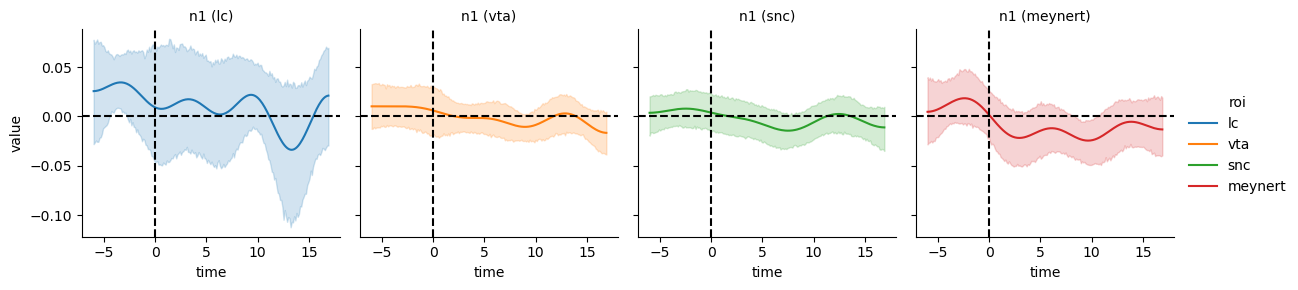

In [6]:
df = []

for mask in masks:
    fn = op.join(bids_folder, 'derivatives', 'roi_analysis', 'model-neural3', mask, 'timeseries.tsv')
    df.append(pd.read_csv(fn, sep='\t', index_col=[0,1,2, 3])[mask].to_frame('value'))

df = pd.concat(df, keys=masks, names=['roi'])

tmp = df.xs('sd', 0, 'covariate').reset_index()

fac = sns.FacetGrid(tmp, row='event type', col='roi',  hue='roi', col_order=order, hue_order=order)
fac.map(sns.lineplot, 'time', 'value', errorbar=('ci', 95))
fac.map(lambda *args, **kwargs: plt.axhline(0,0, c='k', ls='--'))
fac.map(lambda *args, **kwargs: plt.axvline(0,0, c='k', ls='--'))
fac.add_legend()
fac.set_titles('{row_name} ({col_name})')
# sns.lineplot(tmp.reset_index(), x='time', y='value', col='roi', col_wrap=2)

Using a threshold of 2.045230
stat_fun(H1): min=-0.937456 max=2.426672
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

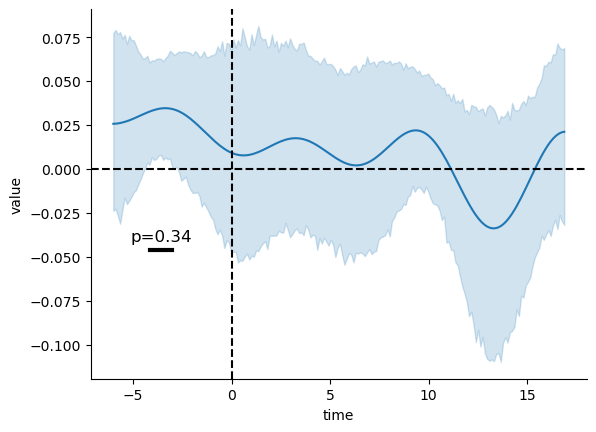

In [72]:
ts = df.xs('lc', 0, 'roi').xs('sd', 0, 'covariate')
tmp = ts.unstack('time')['value']

Ot_obs, clusters, cluster_pv, H0 = permutation_cluster_1samp_test(tmp.values)

sns.lineplot(ts.reset_index(), x='time', y='value')
sns.despine()
ts

for p, cl in zip(cluster_pv, clusters):
    times = ts.index.get_level_values('time')[cl] 
    y = ts.loc[(slice(None), slice(None), times), :].mean() - ts.loc[(slice(None), slice(None), times), :].std()
    plt.plot([times.min(), times.max()], [y, y], lw=3, c='k')
    plt.text(times.values.mean(), y+0.005, f'p={p:.2f}', ha='center', fontsize=12.)

plt.axhline(0.0, c='k', ls='--')
plt.axvline(0.0, c='k', ls='--')

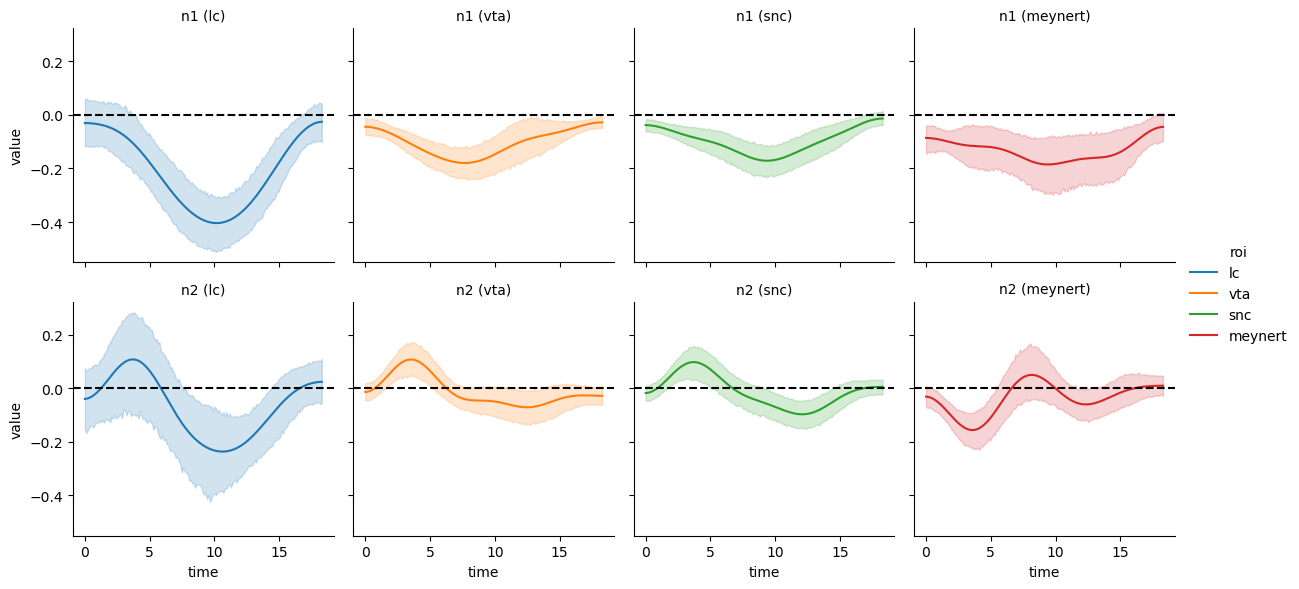

In [7]:
df = []

for mask in masks:
    fn = op.join(bids_folder, 'derivatives', 'roi_analysis', 'model-n1_n2_evdiff', mask, 'timeseries.tsv')
    df.append(pd.read_csv(fn, sep='\t', index_col=[0,1,2, 3])[mask].to_frame('value'))

df = pd.concat(df, keys=masks, names=['roi'])

tmp = df.xs('intercept', 0, 'covariate').reset_index()

fac = sns.FacetGrid(tmp, row='event type', col='roi', hue='roi', col_order=order, hue_order=order)
fac.map(sns.lineplot, 'time', 'value', errorbar=('ci', 95))
fac.map(lambda *args, **kwargs: plt.axhline(0,0, c='k', ls='--'))
fac.add_legend()
fac.set_titles('{row_name} ({col_name})')
# sns.lineplot(tmp.reset_index(), x='time', y='value', col='roi', col_wrap=2)


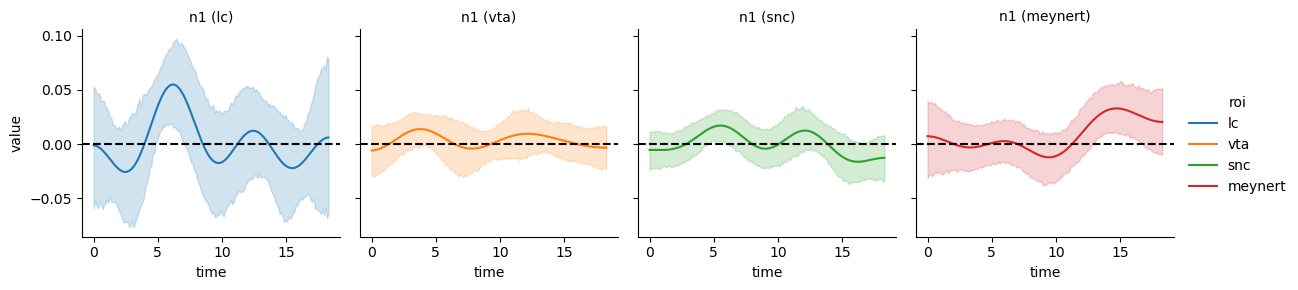

In [9]:
df = []

for mask in masks:
    fn = op.join(bids_folder, 'derivatives', 'roi_analysis', 'model-n1_n2_evdiff', mask, 'timeseries.tsv')
    df.append(pd.read_csv(fn, sep='\t', index_col=[0,1,2, 3])[mask].to_frame('value'))

df = pd.concat(df, keys=masks, names=['roi'])

tmp = df.xs('ev', 0, 'covariate').reset_index()

fac = sns.FacetGrid(tmp, row='event type', hue='roi', col='roi', col_order=order, hue_order=order)
fac.map(sns.lineplot, 'time', 'value', errorbar=('ci', 95))
fac.map(lambda *args, **kwargs: plt.axhline(0,0, c='k', ls='--'))
fac.add_legend()
fac.set_titles('{row_name} ({col_name})')
# sns.lineplot(tmp.reset_index(), x='time', y='value', col='roi', col_wrap=2)


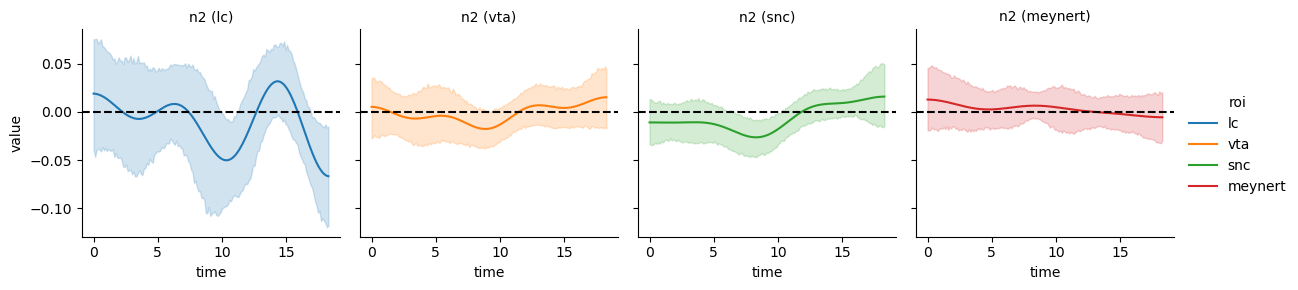

In [12]:
df = []

for mask in masks:
    fn = op.join(bids_folder, 'derivatives', 'roi_analysis', 'model-n1_n2_evdiff', mask, 'timeseries.tsv')
    df.append(pd.read_csv(fn, sep='\t', index_col=[0,1,2, 3])[mask].to_frame('value'))

df = pd.concat(df, keys=masks, names=['roi'])

tmp = df.xs('ev_diff', 0, 'covariate').reset_index()

fac = sns.FacetGrid(tmp, row='event type', hue='roi', col='roi', col_order=order, hue_order=order)
fac.map(sns.lineplot, 'time', 'value', errorbar=('ci', 95))
fac.map(lambda *args, **kwargs: plt.axhline(0,0, c='k', ls='--'))
fac.add_legend()
fac.set_titles('{row_name} ({col_name})')
# sns.lineplot(tmp.reset_index(), x='time', y='value', col='roi', col_wrap=2)


Using a threshold of 2.045230
stat_fun(H1): min=-1.161892 max=3.000803
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

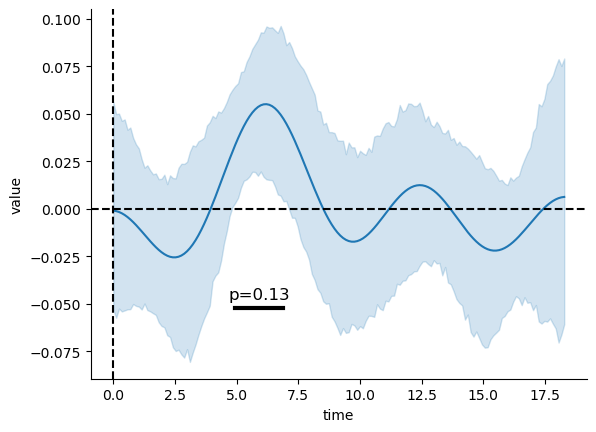

In [76]:
ts = df.xs('lc', 0, 'roi').xs('ev', 0, 'covariate')
tmp = ts.unstack('time')['value']

Ot_obs, clusters, cluster_pv, H0 = permutation_cluster_1samp_test(tmp.values)

sns.lineplot(ts.reset_index(), x='time', y='value')
sns.despine()
ts

for p, cl in zip(cluster_pv, clusters):
    times = ts.index.get_level_values('time')[cl] 
    y = ts.loc[(slice(None), slice(None), times), :].mean() - ts.loc[(slice(None), slice(None), times), :].std()
    plt.plot([times.min(), times.max()], [y, y], lw=3, c='k')
    plt.text(times.values.mean(), y+0.005, f'p={p:.2f}', ha='center', fontsize=12.)

plt.axhline(0.0, c='k', ls='--')
plt.axvline(0.0, c='k', ls='--')

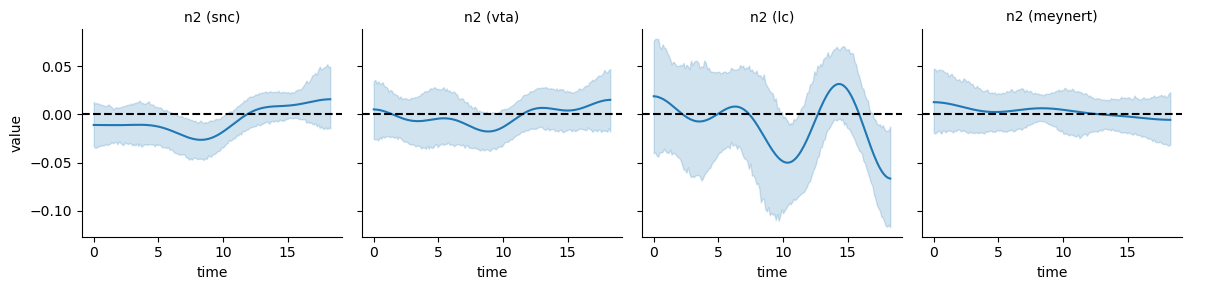

In [75]:
df = []

for mask in masks:
    fn = op.join(bids_folder, 'derivatives', 'roi_analysis', 'model-n1_n2_evdiff', mask, 'timeseries.tsv')
    df.append(pd.read_csv(fn, sep='\t', index_col=[0,1,2, 3])[mask].to_frame('value'))

df = pd.concat(df, keys=masks, names=['roi'])

tmp = df.xs('ev_diff', 0, 'covariate').reset_index()

fac = sns.FacetGrid(tmp, row='event type', col='roi', palette=['gray'])
fac.map(sns.lineplot, 'time', 'value', errorbar=('ci', 95))
fac.map(lambda *args, **kwargs: plt.axhline(0,0, c='k', ls='--'))
fac.add_legend()
fac.set_titles('{row_name} ({col_name})')
# sns.lineplot(tmp.reset_index(), x='time', y='value', col='roi', col_wrap=2)


Using a threshold of 2.045230
stat_fun(H1): min=-2.440810 max=1.660459
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

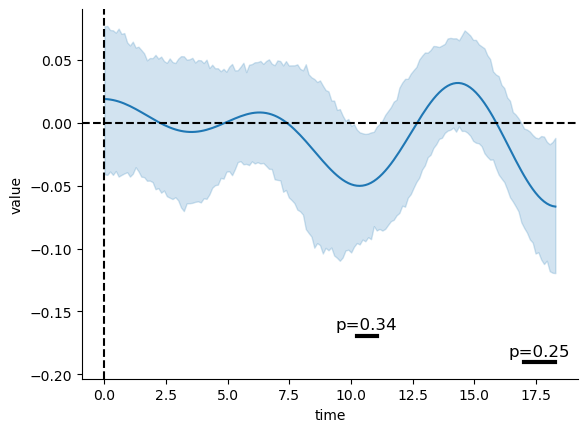

In [77]:
ts = df.xs('lc', 0, 'roi').xs('ev_diff', 0, 'covariate')
tmp = ts.unstack('time')['value']

Ot_obs, clusters, cluster_pv, H0 = permutation_cluster_1samp_test(tmp.values)

sns.lineplot(ts.reset_index(), x='time', y='value')
sns.despine()
ts

for p, cl in zip(cluster_pv, clusters):
    times = ts.index.get_level_values('time')[cl] 
    y = ts.loc[(slice(None), slice(None), times), :].mean() - ts.loc[(slice(None), slice(None), times), :].std()
    plt.plot([times.min(), times.max()], [y, y], lw=3, c='k')
    plt.text(times.values.mean(), y+0.005, f'p={p:.2f}', ha='center', fontsize=12.)

plt.axhline(0.0, c='k', ls='--')
plt.axvline(0.0, c='k', ls='--')

Using a threshold of 2.045230
stat_fun(H1): min=-2.689927 max=1.355605
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

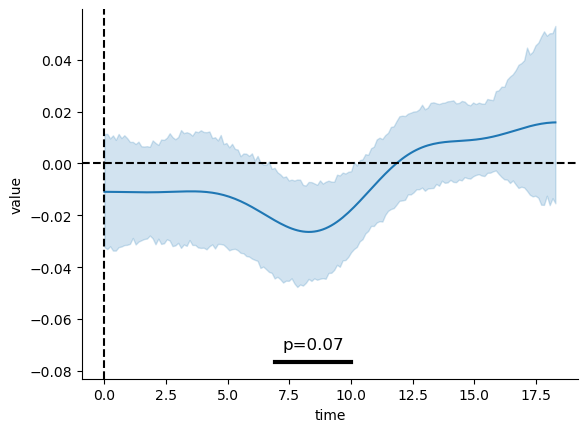

In [78]:
ts = df.xs('snc', 0, 'roi').xs('ev_diff', 0, 'covariate')
tmp = ts.unstack('time')['value']

Ot_obs, clusters, cluster_pv, H0 = permutation_cluster_1samp_test(tmp.values)

sns.lineplot(ts.reset_index(), x='time', y='value')
sns.despine()
ts

for p, cl in zip(cluster_pv, clusters):
    times = ts.index.get_level_values('time')[cl] 
    y = ts.loc[(slice(None), slice(None), times), :].mean() - ts.loc[(slice(None), slice(None), times), :].std()
    plt.plot([times.min(), times.max()], [y, y], lw=3, c='k')
    plt.text(times.values.mean(), y+0.005, f'p={p:.2f}', ha='center', fontsize=12.)

plt.axhline(0.0, c='k', ls='--')
plt.axvline(0.0, c='k', ls='--')